## Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import re

from wordcloud import WordCloud

## Load the Dataset

In [63]:
df = pd.read_csv(r"data.csv")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.R...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest.... Sad to hear this.READ MORE,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.READ MORE,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the corks like not as before 3 to 5 years back.. I am using MAVIS 350 for more than 15 years quality of corks was very very good at that times, but now I...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn't understand.. Wat is d advantage of buying dis frm flipkrtREAD MORE,1


## Check Dataset Shape

In [64]:
df.shape

(8518, 8)

**Observation :-** There are `8518 rows` and `8 columns` present in the dataset.

## Check For Columns.

In [65]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

## Check for info

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


**Observation :-** 

## Check For Describe.

In [67]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [68]:
df.describe(include = 'object')

,Reviewer Name,Review Title,Place of Review,Month,Review text
count,8508,8508,8468,8053,8510
unique,6243,194,2337,80,4983
top,Flipkart Customer,Wonderful,"Certified Buyer, Bengaluru",Oct 2020,GoodREAD MORE
freq,2098,416,319,237,695


## Checking for Null Values

In [69]:
df.isna().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [70]:
## Percentage of null values present
(df.isna().sum() / len(df)) * 100

Reviewer Name      0.117398
Review Title       0.117398
Place of Review    0.586992
Up Votes           0.117398
Down Votes         0.117398
Month              5.459028
Review text        0.093919
Ratings            0.000000
dtype: float64

**Observation :-** The missing data is nearly `5%` so we can drop it.

In [71]:
df = df.dropna()

In [72]:
# Recheck for missing values
df.isna().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

## Check for duplicate 

In [73]:
df.duplicated().sum()

0

**Observation :-** There are no Duplicates present in the data set.

## Visualization 

## 1. Ratings Distribution (Very Important)

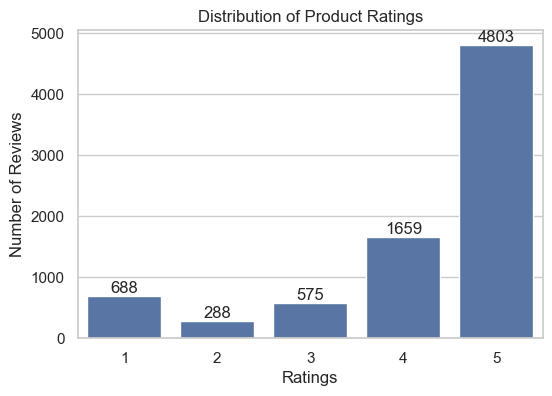

In [74]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Ratings', data=df)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel("Ratings")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Product Ratings")
plt.show()


**Observation :-** 
- Most customer reviews are 4-star and 5-star, indicating high overall satisfaction with the product.
- Lower ratings (1–3 stars) are comparatively fewer, showing limited customer dissatisfaction.

## 2. Create Sentiment Column (For EDA & ML)

In [75]:
df['Sentiment'] = df['Ratings'].apply(
    lambda x: 1 if x >= 4 else 0
)

### Sentiment Distribution

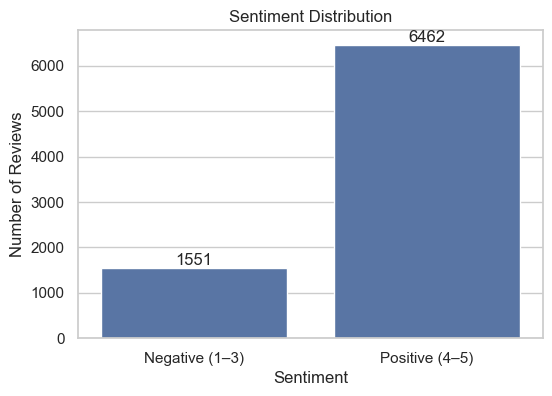

In [76]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Sentiment', data=df)

for i in ax.containers:
    ax.bar_label(i)

plt.xticks([0,1], ['Negative (1–3)', 'Positive (4–5)'])
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution")
plt.show()


**Observation :-**
- The sentiment distribution shows that positive reviews (4–5 ratings) are significantly higher than negative reviews (1–3 ratings).
- This indicates that most customers have a favorable experience with the product.

## 3. Review Length Analysis

In [77]:
df['review_length'] = df['Review text'].apply(
    lambda x: len(str(x).split())
)

In [78]:
df.groupby('Sentiment')['review_length'].mean()

Sentiment
0    9.437782
1    5.532188
Name: review_length, dtype: float64

## 4. Common Words in Negative & Positive Reviews (Pain Points)

In [79]:
# Positive
negative_reviews = " ".join(
    df[df['Sentiment'] == 0]['Review text'].astype(str)
)

words = re.findall(r'\b\w+\b', negative_reviews.lower())
Counter(words).most_common(15)

[('more', 1574),
 ('not', 496),
 ('read', 421),
 ('the', 419),
 ('is', 353),
 ('quality', 319),
 ('very', 303),
 ('product', 284),
 ('good', 251),
 ('it', 245),
 ('shuttle', 240),
 ('of', 224),
 ('i', 192),
 ('bad', 192),
 ('goodread', 173)]

In [80]:
# Positive Reviews
positive_reviews = " ".join(
    df[df['Sentiment'] == 1]['Review text'].astype(str)
)

words = re.findall(r'\b\w+\b', negative_reviews.lower())
Counter(words).most_common(15)

[('more', 1574),
 ('not', 496),
 ('read', 421),
 ('the', 419),
 ('is', 353),
 ('quality', 319),
 ('very', 303),
 ('product', 284),
 ('good', 251),
 ('it', 245),
 ('shuttle', 240),
 ('of', 224),
 ('i', 192),
 ('bad', 192),
 ('goodread', 173)]

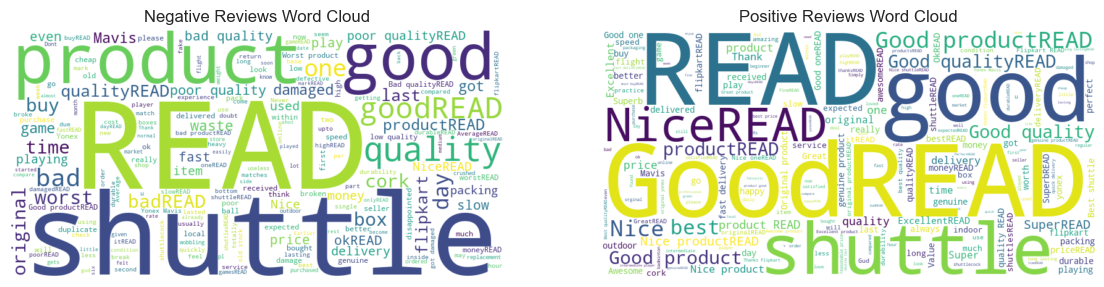

In [81]:
# Combine cleaned text
negative_text = " ".join(df[df['Sentiment'] == 0]['Review text'])
positive_text = " ".join(df[df['Sentiment'] == 1]['Review text'])

# Create word clouds
wc_negative = WordCloud(width=800, height=400, background_color='white')
wc_positive = WordCloud(width=800, height=400, background_color='white')

wc_negative.generate(negative_text)
wc_positive.generate(positive_text)

# Plot side by side
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")

plt.show()

**Observation :-**
- The negative reviews word cloud highlights frequent issues such as `bad quality`, `duplicate product`, `damage`, and `packaging problems`, indicating customer dissatisfaction.
- The positive reviews word cloud emphasizes words like `good`, `great`, `quality`, and s`huttle`, showing overall customer satisfaction and positive product experience.

# Data Preprocessing

#### Import necessary Libraries

In [82]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [83]:
# make sure these are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_review(text):
    # Convert to string (safety)
    text = str(text)
    
    # Remove 'READ MORE'
    text = text.replace('READ MORE', '').replace('read more', '')
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Stopword removal and lemmatization
    cleaned_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words
    ]
    
    # Join tokens back to string
    return " ".join(cleaned_tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
df['clean_review_text'] = df['Review text'].apply(clean_review)

In [85]:
df[['Review text', 'clean_review_text']].head()

,Review text,clean_review_text
0,"Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.R...",nice product good quality price rising bad sign affordable price especially play everyday kindly help u term price thank
1,They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest.... Sad to hear this.READ MORE,supplied yonex mavis outside cover yonex ad inside cheapest sad hear
2,Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.READ MORE,worst product damaged shuttlecock packed new box original yonex product buy flipkart platform chosen fraud buyer
5,Good quality product. Delivered on time.READ MORE,good quality product delivered time
6,BEST PURCHASE It is a good quality and is more durable than any average shuttle. And shipping was goodREAD MORE,best purchase good quality durable average shuttle shipping good


**Observation:-**
- This step cleans the review text by removing unnecessary words, symbols, and stopwords, and converts words to their base form.
- The cleaned text is more structured and suitable for feature extraction and model training.

In [86]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment,review_length,clean_review_text
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.R...",4,1,37,nice product good quality price rising bad sign affordable price especially play everyday kindly help u term price thank
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest.... Sad to hear this.READ MORE,1,0,20,supplied yonex mavis outside cover yonex ad inside cheapest sad hear
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.READ MORE,1,0,24,worst product damaged shuttlecock packed new box original yonex product buy flipkart platform chosen fraud buyer
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,1,7,good quality product delivered time
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more durable than any average shuttle. And shipping was goodREAD MORE,5,1,20,best purchase good quality durable average shuttle shipping good


In [87]:
df.isna().sum()

Reviewer Name        0
Review Title         0
Place of Review      0
Up Votes             0
Down Votes           0
Month                0
Review text          0
Ratings              0
Sentiment            0
review_length        0
clean_review_text    0
dtype: int64

In [91]:
df = df.dropna()

## Save the final Dataset.

In [92]:
df.to_csv("flipkart_reviews.csv", index=False)

In [93]:
df['Review text'].head()

0    Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.R...
1                                                                                     They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest....  Sad to hear this.READ MORE
2                                              Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.READ MORE
5                                                                                                                                                          Good quality product. Delivered on time.READ MORE
6                                                                                            BEST PURCHASE It is a good quality and is more durable than any average shuttle. And sh